In [ ]:
# Generically plot rocket launch data, given start and end dates
# Base start and end times on XLS file - including whether landers
# Assume data are in SDS archive
# Need a consistent way to store stationXML files too - currently in Fieldwork/Response folder
# Try to download any additional RShake data available, just in case
# Could also try to download any Florida seismic stations not at KSC

In [ ]:
# libraries and paths
import os, glob, obspy, sys, datetime
print('Current working directory is %s' % os.getcwd())
HOME = os.getenv('HOME')
sys.path.append(os.path.join(HOME, 'src','kitchensinkGT','LIB'))
import USF_instrument_responses as USF
from libTonga import plot_record_section, order_traces_by_id, get_distance_vector, order_traces_by_distance
sys.path.append(os.path.join(HOME, 'src','GitHub','icewebPy'))
import IceWeb
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams["figure.figsize"] = [19.2, 10.8]
#mpl.rcParams["figure.autolayout"] = True
#mpl.rc('font', size=24)
from libseisGT import inventory2traceid, get_FDSN_inventory, get_FDSN_Stream, read_sds

# SDS_TOP is path where YYYY directories reside. SDS directory structure is like YYYY/NET/STATION/CHANNEL.D
# Check if Lacie DATA drive connected. Otherwise, try Dropbox
SDS_TOP = '/Volumes/DATA/SDS'
if not os.path.isdir(SDS_TOP):
    SDS_TOP = os.path.join(HOME, 'Dropbox', 'DATA', 'SDS')
end

# new functions
def summarize_st(st):
    print('Summarizing')
    for tr in st:
        print('%s, %10.0f counts/(%s), %e %s p2p, %7.0f m' % \
              (tr.id, tr.stats.sensitivity, tr.stats.units, \
               max(tr.data)-min(tr.data), tr.stats.units, tr.stats.distance)  )          



startt = obspy.UTCDateTime(2022,11,12,16,6,0)
st = sds2stream(SDS_TOP, startt-60, startt+120 )

print(st)

st.select(channel='H??').plot(equal_scale=False)

SDS_TOP="."



stationXmlFile = 'rs.xml'
mseedfile = 'rs.mseed'
centerLon = 0
centerLat = 52
searchRadiusDeg = 0.9

inv, st = read_raspshakenet(startt, startt+120, mseedfile, stationXmlFile, \
                centerLat, centerLon, searchRadiusDeg)

print(st)

write_stream2sds(st, SDS_TOP)

In [28]:
print(os.getcwd())

/Users/thompsong/Movies/Artemis/src


In [3]:
    
def correct_local_rshake_data(trace_id):
    (net, sta, loc, chan) = trace_id.split('.')
    sdsfile = os.path.join(DATADIR, '%s.D.2022.320' % trace_id)
    xmlfile = os.path.join(XMLDIR, '%s.xml' % sta)
    correctedfile = os.path.join(DATADIR, '%s.D.2022.320_corrected.pkl' % trace_id)
    inv = None
    try:
        if os.path.isfile(xmlfile):
            inv = obspy.read_inventory(xmlfile)
        else:
            inv = obspy.read_inventory('https://fdsnws.raspberryshakedata.com/fdsnws/station'\
                '/1/query?network=%s&station=%s&level=resp&format=xml' % (net, sta))
            inv = get_FDSN_inventory(fdsnClient, row['time'], stationXmlFile, NETWORK, \
                LATITUDE, LONGITUDE, searchRadiusDeg, PRE_TRIGGER_SECS, POST_TRIGGER_SECS )
    startt = row['time'] - PRE_TRIGGER_SECS
    endt = row['time'] + POST_TRIGGER_SECS    
        stR = get_FDSN_Stream(fdsnClient, trace_ids, rawfile, startt, endt )            
            inventory.write(xmlfile, format='STATIONXML')
    except:
        print('No inventory found online or at %s' % xmlfile)
    else:
        st = obspy.read(sdsfile)
        st.attach_response(inv)
        st.filter('highpass', freq=0.5, corners=2, zerophase=True)
        st = st.remove_response()
        st.trim(starttime=stime,endtime=etime);
        st.merge(fill_value=0)
        for tr in st:
            print('Data for %s already corrected' % tr.id)
            tr.stats.corrected = True # this will prevent gain being reapplied later            
        print('Writing %s' % correctedfile)
        st.write(correctedfile, 'pickle')

        
# Constants
olat = (28 + 37/60 + 38/3600) 
olon = -(80 + 37/60 + 15/3600)
stime = obspy.UTCDateTime(2022,11,12,16,6,0)
etime = stime + 360
distances={'MTEGL': 1500, 'S39A1': 3080, 'BCHH2': 7500, 'BCHH4': 7500, 'R1E5E': 12800}
TOPDIR = os.path.join(HOME, 'Movies', 'Artemis')
SDS_TOP=
DATADIR = os.path.join(TOPDIR, 'DATA')
XMLDIR = os.path.join(TOPDIR, 'stationXML')
FIGDIR = os.path.join(TOPDIR, 'FIGURES')

# Original data files - Note: R1E5E_fixed.mseed has already been instrument corrected 
rshake_trace_id = 'AM.R1E5E.00.EHZ'
rshake_file = os.path.join(DATADIR, '%s.D.2022.320_corrected.pkl' % rshake_trace_id)
if not os.path.isfile(rshake_file):
    correct_local_rshake_data(rshake_trace_id)    
USFrawfiles = [os.path.join(DATADIR,'S39A1.seed'), os.path.join(DATADIR,'BCHH2.seed'), \
               os.path.join(DATADIR,'BCHH4.seed'), rshake_file] #'../DATA/R1E5E_fixed.mseed']
paul_minute_files = glob.glob(os.path.join(DATADIR,'paul/*.ms'))
paul_rawfile = os.path.join(DATADIR,'XA.MTEGL.pkl')
USF_rawfile = os.path.join(DATADIR, 'USF_raw.pkl')

# Processed
USF_correctedfile = os.path.join(DATADIR, 'USF_corrected.pkl')
VELfile = os.path.join(DATADIR, 'ALL_seismic_VEL.pkl')
ACCfile = os.path.join(DATADIR, 'ALL_seismic_ACC.pkl')
INFRAfile = os.path.join(DATADIR, 'ALL_infrasound.pkl')

print('Setup complete')

Current working directory is /Users/thompsong/Movies/Artemis/src
Setup complete


In [2]:
# Read RSHAKE data & correct it
from obspy.clients.fdsn import Client
rs = Client(base_url='https://fdsnws.raspberryshakedata.com/') 

def correct_local_rshake_data(trace_id):
    (net, sta, loc, chan) = trace_id.split('.')
    sdsfile = os.path.join(DATADIR, '%s.D.2022.320' % trace_id)
    xmlfile = os.path.join(XMLDIR, '%s.xml' % sta)
    correctedfile = os.path.join(DATADIR, '%s.D.2022.320_corrected.pkl' % trace_id)
    inv = None
    try:
        if os.path.isfile(xmlfile):
            inv = obspy.read_inventory(xmlfile)
        else:
            inv = obspy.read_inventory('https://fdsnws.raspberryshakedata.com/fdsnws/station'\
                '/1/query?network=%s&station=%s&level=resp&format=xml' % (net, sta))
            inventory.write(xmlfile, format='STATIONXML')
    except:
        print('No inventory found online or at %s' % xmlfile)
    else:
        st = obspy.read(sdsfile)
        st.attach_response(inv)
        st.filter('highpass', freq=0.5, corners=2, zerophase=True)
        st = st.remove_response()
        st.trim(starttime=stime,endtime=etime);
        st.merge(fill_value=0)
        for tr in st:
            print('Data for %s already corrected' % tr.id)
            tr.stats.corrected = True # this will prevent gain being reapplied later            
        print('Writing %s' % correctedfile)
        st.write(correctedfile, 'pickle')

# set the station name and download the response information
trace_ids = ['AM.R1E5E.00.EHZ']        
for trace_id in trace_ids: 
    correct_local_rshake_data(trace_id)
    

Data for AM.R1E5E.00.EHZ already corrected
Writing /Users/thompsong/Movies/Artemis/DATA/AM.R1E5E.00.EHZ.D.2022.320_corrected.pkl


In [3]:
# Load raw SEED files from USF stations
USF_st = obspy.Stream()
if os.path.exists(USF_rawfile):
    USF_st = obspy.read(USF_rawfile)
else:
    for rawfile in USFrawfiles:
        if os.path.isfile(rawfile):
            if rawfile[-3:]=='pkl':
                this_st = obspy.read(rawfile, 'pickle')
            else:
                this_st = obspy.read(rawfile, 'mseed')
            this_st.merge(fill_value=1)
            for tr in this_st:
                #print(tr.id)
                #if tr.stats.network == 'AM':
                #    print('Data for %s already corrected' % tr.id)
                #    tr.stats.corrected = True # this will prevent gain being reapplied later
                USF_st.append(tr)
    USF_st.write(USF_rawfile, 'pickle') 
print('USF seismic data loaded/written')

USF seismic data loaded/written


In [4]:
# apply calibration corrections - but would be better to create full inventory stationXML files
USF_st = obspy.read(USF_rawfile)
USF_stc = USF_st.copy()
USF.correctUSFstations(USF_stc)            
print('USF stations calibration corrected')

# For plotting purposes, reset calib to 1. Other ObsPy messes it up.
for tr in USF_stc:
    tr.stats['sensitivity']=tr.stats.calib
    tr.stats.calib = 1.0 # this is just so that plots are not messed up. ObsPy applies tr.stats.calib before plotting
    tr.stats.distance = distances[tr.stats.station]
for tr in USF_stc:
    if tr.stats.network == 'AM':
        # RS and RB response files are here https://manual.raspberryshake.org/bru2.html#instrument-response-files
        tr.stats.calib = 1.0
        if tr.stats.channel[1]=='D':
            tr.stats['sensitivity'] = 56000 # counts per Pa, see email 2020/07/01 and https://manual.raspberryshake.org/_downloads/SpecificationsforBoom_SnB.pdf
            tr.stats.units = 'Pa'
        elif tr.stats.channel[1]=='H':
            tr.stats['sensitivity'] = 353090000 # counts per m/s, see https://www.gempageoservices.com/wp-content/uploads/2017/10/Specifications-RaspberryShake-3D.pdf
            tr.stats.units = 'm/s' 

        if not 'corrected' in tr.stats or not tr.stats.corrected: # use tr.stats.corrected = True
            print('Correcting %s' % tr.id)
            tr.data = tr.data/tr.stats['sensitivity'] 
            tr.stats.corrected = True
r = get_distance_vector(USF_stc)
USF_stc = order_traces_by_distance(USF_stc, r, assert_channel_order=True)
USF_stc.trim(starttime=stime, endtime=etime)
print(USF_stc)            
USF_stc.write(USF_correctedfile, 'pickle')                 
print('USF data corrected/trimmed/written. Calibs fixed to 1.0') 

USF stations calibration corrected
19 Trace(s) in Stream:
FL.S39A1.00.HHZ | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.S39A1.00.HHN | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.S39A1.00.HHE | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.S39A1.10.HDF | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.S39A1.10.HD2 | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.S39A1.10.HD3 | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.BCHH4.00.HDF | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.BCHH4.00.HD2 | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.BCHH4.00.HD3 | 2022-11-16T06:47:44.000000Z - 2022-11-16T06:50:44.000000Z | 100.0 Hz, 18001 samples
FL.BCHH4.10.HHZ | 2022-1

infrasound plotted


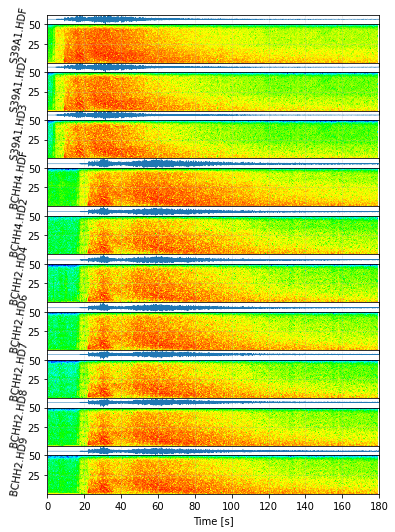

In [5]:
# INFRASOUND

# Remove bad infrasound channels
infrasound_st = USF_stc.select(channel='HD?')
for tr in infrasound_st.select(id="FL.BCHH2.10.HD5"):
    infrasound_st.remove(tr)  
for tr in infrasound_st.select(id="FL.BCHH4.00.HD3"):
    infrasound_st.remove(tr)  
    
# Plot infrasound
infrasound_st.plot(equal_scale=True, outfile=os.path.join(FIGDIR,'artemis_infrasound.png'))
infrasound_st.plot(outfile=os.path.join(FIGDIR,'artemis_record_section_infrasound.png'), type='section', orientation='horizontal', norm_method='stream')
infrasound_st.write(INFRAfile, 'pickle')
spobj_infrasound = IceWeb.icewebSpectrogram(stream=infrasound_st)
sgramfile = os.path.join(FIGDIR,'specgram_infrasound_unscaled.png')
spobj_infrasound.plot(outfile=sgramfile, dbscale=True, equal_scale=False, fmax=50.0, add_colorbar=False)
print('infrasound plotted')

seismic velocity plotted - verticals only


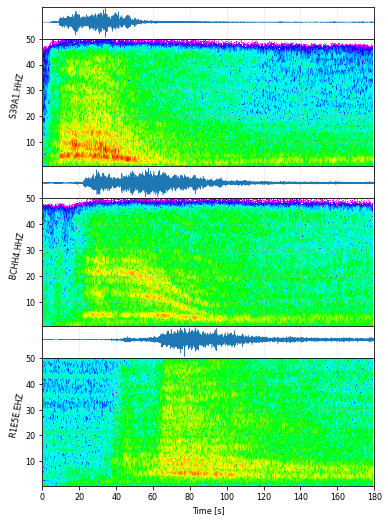

In [6]:
# SEISMIC VELOCITY

seismic_VEL_st = USF_stc.select(channel='?H?')
seismic_VEL_st.plot(equal_scale=True, outfile=os.path.join(FIGDIR,'artemis_seismic_VEL.png'))
seismic_VEL_st.select(component='Z').plot(outfile=os.path.join(FIGDIR,'artemis_record_section_seismic_VEL_Z.png'), type='section', orientation='horizontal', norm_method='stream')
seismic_VEL_st.write(VELfile, 'pickle')
spobj_seismic_VEL = IceWeb.icewebSpectrogram(stream=seismic_VEL_st.select(component='Z'))
sgramfile = os.path.join(FIGDIR,'specgram_seismic_VEL_scaled.png')
spobj_seismic_VEL.plot(outfile=sgramfile, dbscale=True, equal_scale=True, fmax=50.0, add_colorbar=False)
print('seismic velocity plotted - verticals only')

Paul seismic data loaded/written
Paul station gain corrected assuming 10000000 counts per m/s^2
Summarizing
XA.MTEGL.01.CNE,   10000000 counts/(m/s^2), 1.458803e-01 m/s^2 p2p,    1500 m
XA.MTEGL.01.CNN,   10000000 counts/(m/s^2), 1.604095e-01 m/s^2 p2p,    1500 m
XA.MTEGL.01.CNZ,   10000000 counts/(m/s^2), 1.283357e-01 m/s^2 p2p,    1500 m
Paul station spectrogram plotted


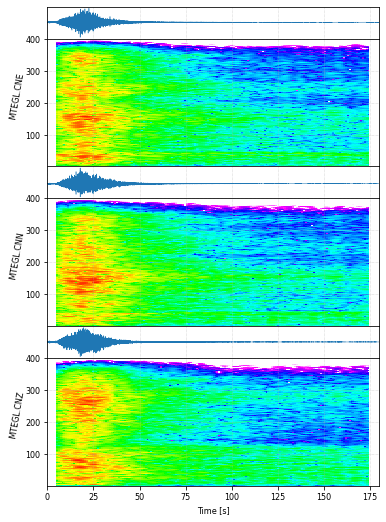

In [7]:
# PAUL's/NASA ACCELEROMETER    
    
# load Paul's station & make plots
if os.path.exists(paul_rawfile):
    paulst = obspy.read(paul_rawfile, 'pickle')
else:
    paulst = obspy.Stream()
    for file in paul_minute_files:
        paulst = paulst + obspy.read(file, 'mseed')
    paulst.merge(fill_value=0)
    paulst.write(paul_rawfile, 'pickle')    
print('Paul seismic data loaded/written')      

# Add a fake calibration to Paul's station. Assumed value
paulcalib = 10000000 
paulst.trim(starttime=stime, endtime=etime)
for tr in paulst:
    tr.data = tr.data/paulcalib
    tr.calib = 1.0
    tr.stats.sensitivity = paulcalib
    tr.stats.units = 'm/s^2'
    tr.stats.distance = distances[tr.stats.station]
print('Paul station gain corrected assuming %d counts per m/s^2' % paulcalib)
summarize_st(paulst)
paulst.plot(equal_scale=True, outfile=os.path.join(FIGDIR,'artemis_seismic_paul.png'))
spobj_paul = IceWeb.icewebSpectrogram(stream=paulst)
sgramfile = os.path.join(FIGDIR,'specgram_paul_scaled.png')
spobj_paul.plot(outfile=sgramfile, dbscale=True, equal_scale=True, fmax=400.0, add_colorbar=False)
print('Paul station spectrogram plotted')

Summarizing
XA.MTEGL.01.CNZ,   10000000 counts/(m/s^2), 1.283357e-01 m/s^2 p2p,    1500 m
XA.MTEGL.01.CNN,   10000000 counts/(m/s^2), 1.604095e-01 m/s^2 p2p,    1500 m
XA.MTEGL.01.CNE,   10000000 counts/(m/s^2), 1.458803e-01 m/s^2 p2p,    1500 m
FL.S39A1.00.HNZ,  300000000 counts/(m/s^2), 7.776033e-02 m/s^2 p2p,    3080 m
FL.S39A1.00.HNN,  300000000 counts/(m/s^2), 5.077050e-02 m/s^2 p2p,    3080 m
FL.S39A1.00.HNE,  300000000 counts/(m/s^2), 6.616933e-02 m/s^2 p2p,    3080 m
FL.BCHH4.10.HNZ,  300000000 counts/(m/s^2), 3.375350e-02 m/s^2 p2p,    7500 m
FL.BCHH4.10.HNN,  300000000 counts/(m/s^2), 4.102283e-02 m/s^2 p2p,    7500 m
FL.BCHH4.10.HNE,  300000000 counts/(m/s^2), 4.376667e-04 m/s^2 p2p,    7500 m
AM.R1E5E.00.ENZ,  353090000 counts/(m/s^2), 3.376395e-02 m/s^2 p2p,   12800 m
seismic acceleration plotted - verticals only


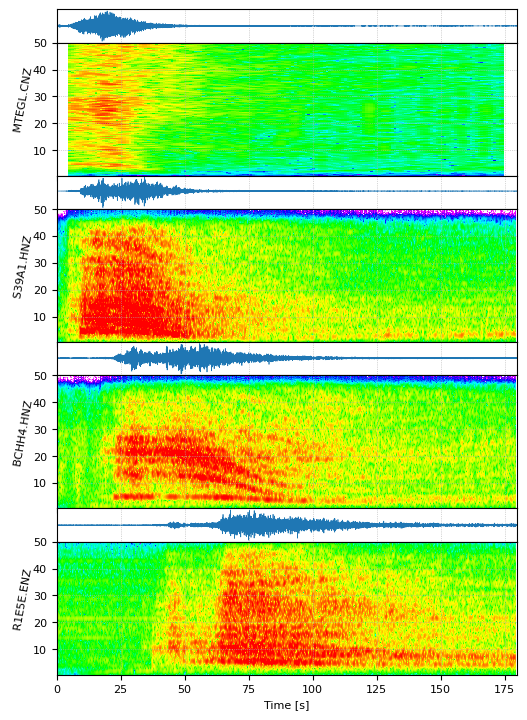

In [111]:
# ACCELERATION
USF_stc = obspy.read(USF_correctedfile, 'pickle')

# differentiate USF velocity channels & add Paul channesl
seismic_ACC_st = USF_stc.select(channel='?H?').differentiate()
for tr in seismic_ACC_st:
    tr.stats.channel = tr.stats.channel[0] + 'N' + tr.stats.channel[2]
    tr.stats.units = 'm/s^2'
    
for tr in paulst:
    seismic_ACC_st.append(tr)
r = get_distance_vector(seismic_ACC_st)
seismic_ACC_st = order_traces_by_distance(seismic_ACC_st, r, assert_channel_order=True)
summarize_st(seismic_ACC_st)
        
# plot and save
seismic_ACC_st.plot(equal_scale=True, outfile=os.path.join(FIGDIR,'artemis_seismic_ACC.png'))
seismic_ACC_st.select(component='Z').plot(outfile=os.path.join(FIGDIR,'artemis_record_section_seismic_ACC_Z.png'), type='section', orientation='horizontal', norm_method='stream')
seismic_ACC_st.write(ACCfile, 'pickle')
spobj_seismic_ACC = IceWeb.icewebSpectrogram(stream=seismic_ACC_st.select(component='Z'))
sgramfile = os.path.join(FIGDIR,'specgram_seismic_ACC_scaled.png')
spobj_seismic_ACC.plot(outfile=sgramfile, dbscale=True, equal_scale=True, fmax=50.0, add_colorbar=False)
print('seismic acceleration plotted - verticals only') 

mseed_acc = os.path.join(DATADIR,'acceleration.mseed')
seismic_ACC_st.select(component='Z').write(mseed_acc, 'mseed')

(<Figure size 576x756 with 8 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='     MTEGL.CNZ'>,
        <AxesSubplot:>, <AxesSubplot:ylabel='     S39A1.HNZ'>,
        <AxesSubplot:>, <AxesSubplot:ylabel='     BCHH4.HNZ'>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     R1E5E.ENZ'>],
       dtype=object))

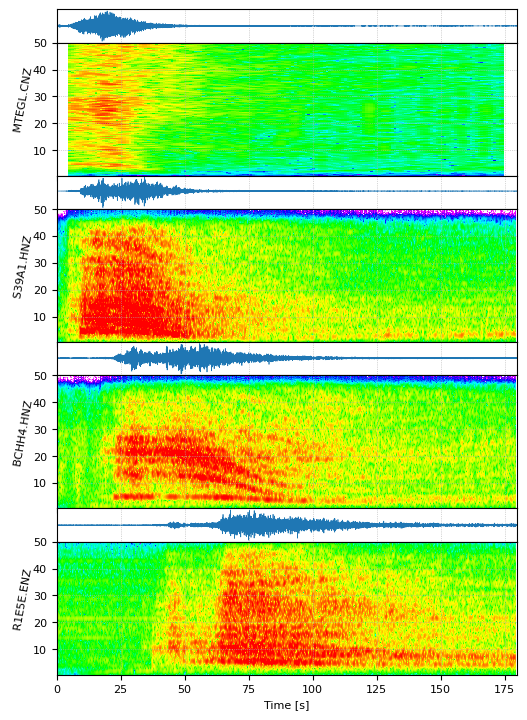

In [112]:
sgramfiletif = os.path.join(FIGDIR,'specgram_seismic_ACC_scaled.tif')
spobj_seismic_ACC.plot(outfile=sgramfiletif, dbscale=True, equal_scale=True, fmax=50.0, add_colorbar=False)

(<Figure size 576x756 with 8 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='     MTEGL.CNZ'>,
        <AxesSubplot:>, <AxesSubplot:ylabel='     S39A1.HNZ'>,
        <AxesSubplot:>, <AxesSubplot:ylabel='     BCHH4.HNZ'>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     R1E5E.ENZ'>],
       dtype=object))

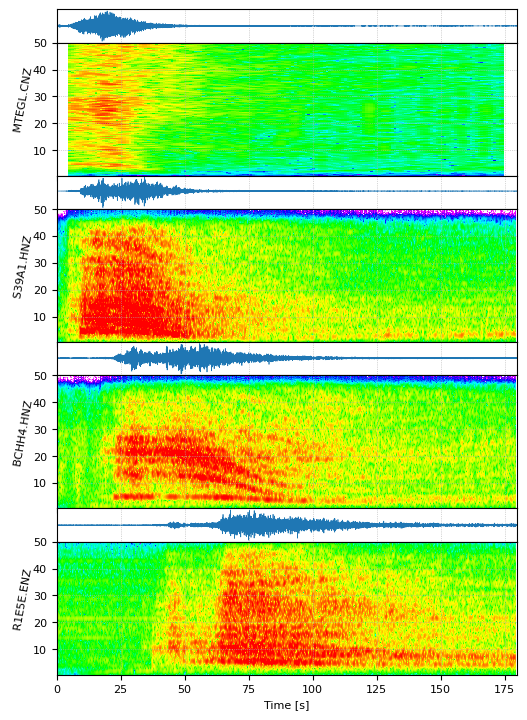

In [112]:
sgramfile = os.path.join(FIGDIR,'specgram_seismic_ACC_scaled.tif')
spobj_seismic_ACC.plot(outfile=sgramfiletif, dbscale=True, equal_scale=True, fmax=50.0, add_colorbar=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csvfile = os.path.join(TOPDIR, 'rocketlaunches.csv')

df1 = pd.read_csv(csvfile)
df1.drop(['Landed', 'Notes', 'Time_UTC'], axis=1, inplace=True)
df1 = df1[['Date', 'Rocket_Payload','SLC']]


csvfile2 = os.path.join(TOPDIR, 'KSC_rocket_launches_MASTER_2016_2019.csv')
df2 = pd.read_csv(csvfile2)
df2['Rocket_Payload']=df2['ROCKET TYPE']+'|'+df2['PAYLOAD']
df2.drop(['ROCKET TYPE', 'PAYLOAD'], axis=1, inplace=True)

df2.rename(columns = {'DATE':'Date'}, inplace = True)

df3 = pd.concat([df2, df1], ignore_index=True)
df3['Date']=pd.to_datetime(df3['Date'])
#print(df3)
df3.to_csv(os.path.join(TOPDIR,'All_KSC_Rocket_Launches.csv'), index=False)

In [10]:
csvfile = os.path.join(TOPDIR, 'All_KSC_Rocket_Launches_2016_2022.csv')

dfall = pd.read_csv(csvfile)
dfall['Date']=pd.to_datetime(dfall['Date'])

import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


decyear=[]
for i in range(len(dfall.index)):
    decyear.append(year_fraction(dfall.iloc[i]['Date']))
dfall['decyear']=decyear
occur = dfall.groupby(['SLC']).size()

In [ ]:
'''
print(occur)
#type(occur)
df3['cum_count'] = df3.groupby('SLC').cumcount()
#print(df3)
print(occur.keys())
for thisSLC in occur.keys():
    df3[thisSLC] = (df['SLC'] == thisSLC).cumsum()
print(df3)
df3.to_csv(os.path.join(TOPDIR,'All_KSC_Rocket_Launches_cumcount.csv'), index=False)
'''

for thisSLC in occur.keys():
    count = 0
    count_list = []
    for i in range(len(dfall.index)):
        if dfall.iloc[i]['SLC']==thisSLC:
            count+=1
        count_list.append(count)
    dfall[thisSLC]=count_list
print(dfall)

In [20]:
#dfall['Other']=dfall['39B']+dfall['46']+dfall['L1011']
cols=occur.keys()
print(cols)
cols = ['37B', '39A', '40', '41', 'Other']
#    decyear.append(year_fraction(df3.iloc[i]['Date']))

Index(['37B', '39A', '39B', '40', '41', '46', 'L1011'], dtype='object', name='SLC')


<Figure size 1920x1080 with 0 Axes>

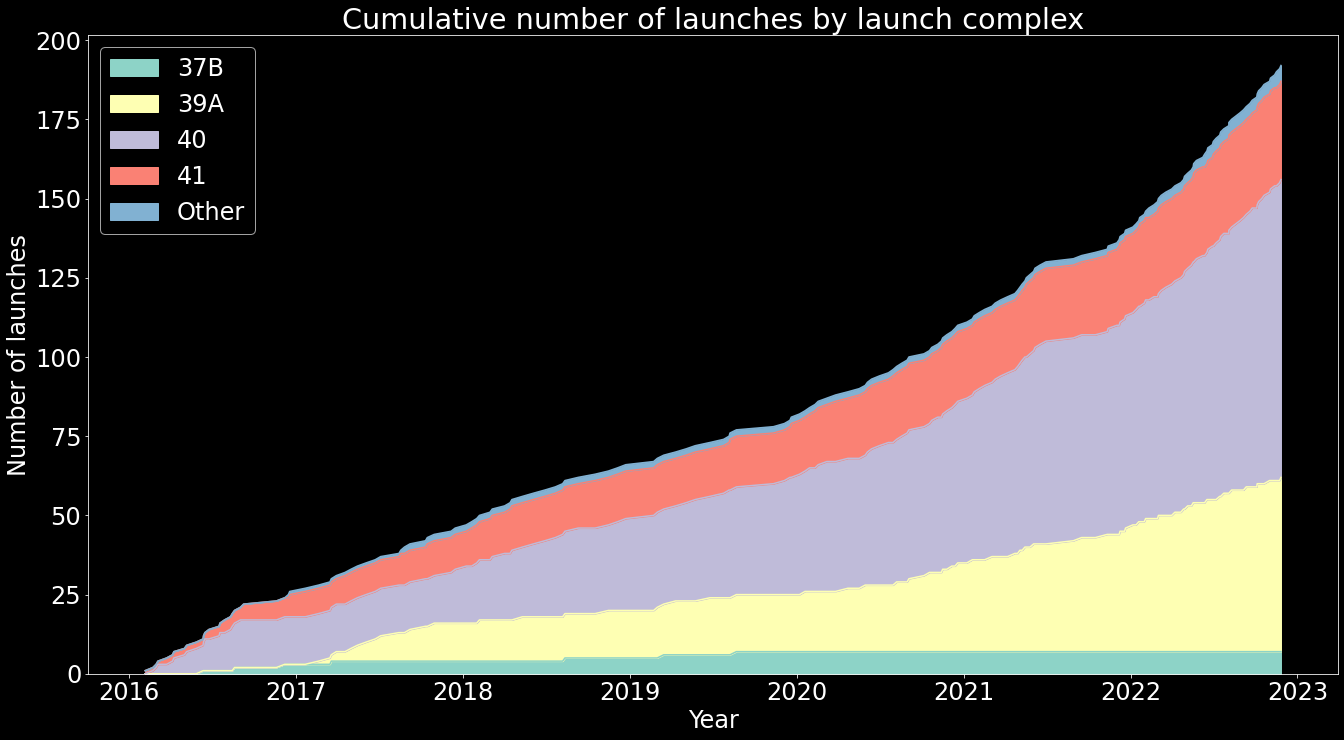

In [21]:
plt.rcParams["figure.figsize"] = [19.2, 10.8]
plt.rcParams["figure.autolayout"] = True
plt.rc('font', size=24)
plt.style.use('dark_background')
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
fig = plt.figure(figsize=(19.2,10.8))
fig.set_dpi(100)
ax = dfall.plot.area(x='decyear',y=cols) # y=occur.keys())
ax.legend(loc='upper left')
ax.set_title('Cumulative number of launches by launch complex')
ax.set_xlabel('Year')
ax.set_ylabel('Number of launches')
plt.savefig(os.path.join(FIGDIR,'cum_launches_opaque.png'), transparent=False, dpi=100)

In [16]:
plt.savefig(os.path.join(FIGDIR,'cum_launches_opaque.png'), transparent=False, dpi=100)

<Figure size 1382.4x777.6 with 0 Axes>